In [8]:
# # 초기 1회 실행
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# 📥 데이터 다운로드 (Download Dataset)
# GitHub에서 csv 파일을 다운로드합니다.

!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabetes_lgr_tr.csv
!wget https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabetes_lgr_te.csv

--2025-06-25 03:16:38--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabetes_lgr_tr.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16675 (16K) [text/plain]
Saving to: ‘diabetes_lgr_tr.csv’

diabetes_lgr_tr.csv 100%[===================>]  16.28K  --.-KB/s    in 0.001s  

2025-06-25 03:16:38 (12.9 MB/s) - ‘diabetes_lgr_tr.csv’ saved [16675/16675]

--2025-06-25 03:16:38--  https://raw.githubusercontent.com/Dropthe-bit/ai_portfolio/main/data/diabetes_lgr_te.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Len

# Machine_Learning1_classifier


In [10]:
## 필요 패키지 설치 및 import
import importlib.util
import subprocess
import sys
def install_and_import(packages):
    for pkg in packages:
        package = pkg
        try:
            importlib.util.find_spec(package)
            print(f"{package} is already installed.")
        except ImportError:
            # 모듈이 설치되어 있지 않은 경우 설치시도
            print(f"{package} is not installed. Installing...")
            subprocess.check_call([sys.executable, "-m", "pip", "install", package])
            subprocess.check_call(["conda", "install", package, "-y"])

            # 설치 후 다시 임포트를 시도
            importlib.import_module(package)
            print(f"{package} has been successfully installed.")

        # finally:
        #     globals()[package] = importlib.import_module(package)
        except Exception as e:
            # 설치 중 예외가 발생한 경우, 에러 메시지를 출력
            print(f"An error occurred while installing {package}: {str(e)}")

# 예시 사용법
install_and_import(['CHAID'])


CHAID is already installed.


In [11]:
## 필요 모듈 임포트
import os, sys, re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

In [13]:
from sklearn.metrics import confusion_matrix

def custom_confusion_matrix(y_true, y_pred):

        ## 혼동 행렬 계산
        cm = confusion_matrix(y_true=y_true,
                                                         y_pred=y_pred)
        ## 클래스 1을 기준으로 행과 열 순서 변경
        cm = cm[::-1, ::-1]

        ## 행과 열을 바꾸기 위해 전치(transpose)
        cm_transposed = cm.T
        print(cm_transposed)


        # DataFrame으로 변환 (라벨 추가)
        df_cm = pd.DataFrame(cm_transposed,
                                                        index = ['pred 1', 'pred 0'],
                                                       columns = ['act 1', 'act 0'])

        ## 히트맵 그리기
        plt.figure(figsize = (7,5))
        sns.heatmap(df_cm, annot = True, fmt = 'd', cmap = 'Blues')
        plt.title('Confusion Matrix (Class 1 as Positive)')
        plt.ylabel('Predicted')
        plt.xlabel('Actual')
        plt.show()

## 데이터 읽기

In [14]:
## 데이터 로드
train_data = pd.read_csv('diabetes_lgr_tr.csv')
test_data = pd.read_csv('diabetes_lgr_te.csv')


## 독립변수(X)과 종속변수(y) 분리
X_train = train_data.drop('class', axis=1)
y_train = train_data['class']
X_test = test_data.drop('class', axis=1)
y_test = test_data['class']

1. plas (Plasma glucose concentration): 공복 혈장 포도당 농도
2. age: 환자의 나이
3. mass (Body mass index): 체질량지수(BMI)
4. preg (Number of pregnancies): 임신 횟수
5. pedi (Diabetes pedigree function): 당뇨병 가족력 지표
6. pres (Blood pressure): 이완기 혈압
7. skin (Skin thickness): 삼두근 피부 주름 두께
8. insu (Insulin): 혈중 인슐린 농도





## 변수 표준화

In [15]:
from sklearn.preprocessing import StandardScaler

# 데이터 전처리: 특성 스케일링
scaler = StandardScaler() # 객체 생성
X_train_scaled = scaler.fit_transform(X = X_train) # 학습데이터에 대해서 표준화 적용

## same as:
## X_train_scaled = scaler.fit(X = X_train)
## X_train_scaled = scaler.transform(X = X_train)


X_test_scaled = scaler.transform(X_test) # "학습데이터의 평균, 표준편차"를 이용해서 테스트 데이터에 대해서 표준화 적용!!!! 매우 중요
## X_train(학습데이터)를 기준으로 표준화가 된 테스트데이터가 들어 있음!!!


- 전체데이터를 표준화 한 다음에 Train/Test로 분할 하면 안됌!
- 학습에 사용할 데이터의 평균, 표준편차를 저장하고(scaler), 새로운 데이터가 들어오면, 학습 데이터의 평균, 표준편차로 표준화를 해야함!
- 왜냐하면
   1.  전체데이터를 표준화 한 후 분할하면, **데이터 누수** 발생가능,
   - 데이터 누수: 테스트 데이터에 대한 정보를 모델 학습 과정에서 사용하는 것
   2. 일관성 유지 측면
   - 테스트 데이터에 대해서 새롭게 표준화를 적용하면, 학습데이터와 다른 분포를 가정하는 꼴임


# 분류 모형

## KNN

### 모델학습

In [16]:
from sklearn.neighbors import KNeighborsClassifier

k = 5

knn = KNeighborsClassifier(n_neighbors = k)

knn.fit(X = X_train_scaled, # 표준화 O
               y = y_train)

KNeighborsClassifier()

In [17]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test_scaled)

accuracy = accuracy_score(y_true = y_test,
                                                        y_pred = y_pred)


accuracy

0.7316017316017316

### 참고

In [18]:
from sklearn.metrics import classification_report

## 참고
print(classification_report(y_true = y_test,
                                                        y_pred = y_pred, digits = 4))

              precision    recall  f1-score   support

           0     0.7561    0.8493    0.8000       146
           1     0.6716    0.5294    0.5921        85

    accuracy                         0.7316       231
   macro avg     0.7139    0.6894    0.6961       231
weighted avg     0.7250    0.7316    0.7235       231



[[ 45  22]
 [ 40 124]]


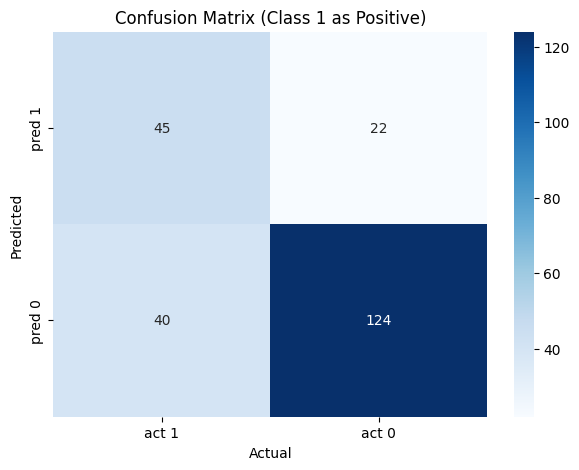

In [19]:
## 참고
custom_confusion_matrix(y_true = y_test, y_pred = y_pred)


In [20]:
## k 값에 따른 정확도 변화
result = []
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X = X_train_scaled,
                   y = y_train)
    y_pred = knn.predict(X_train_scaled)

    accuracy = accuracy_score(y_true = y_train,
                                                            y_pred = y_pred)

    print(f"k = {k}, Train Accuracy: {np.round(accuracy, 3)}")

    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_true = y_test,
                                                            y_pred = y_pred)
    print("            Test Accuracy: ", np.round(accuracy, 3))

    ## best k for test  is
    result.append([k, np.round(accuracy,  3)])


k = 1, Train Accuracy: 1.0
            Test Accuracy:  0.697
k = 2, Train Accuracy: 0.829
            Test Accuracy:  0.706
k = 3, Train Accuracy: 0.853
            Test Accuracy:  0.714
k = 4, Train Accuracy: 0.806
            Test Accuracy:  0.714
k = 5, Train Accuracy: 0.816
            Test Accuracy:  0.732
k = 6, Train Accuracy: 0.791
            Test Accuracy:  0.74
k = 7, Train Accuracy: 0.799
            Test Accuracy:  0.766
k = 8, Train Accuracy: 0.801
            Test Accuracy:  0.736
k = 9, Train Accuracy: 0.788
            Test Accuracy:  0.749
k = 10, Train Accuracy: 0.771
            Test Accuracy:  0.732


In [21]:
result = pd.DataFrame(result, columns = ['k', 'test_accuracy'])
result

,k,test_accuracy
0,1,0.697
1,2,0.706
2,3,0.714
3,4,0.714
4,5,0.732
5,6,0.740
6,7,0.766
7,8,0.736
8,9,0.749
9,10,0.732


In [22]:
max_idx = result['test_accuracy'].idxmax()
result.loc[max_idx]

,6
k,7.000
test_accuracy,0.766


### kNN 결과

In [23]:
## knn 결과
knn = KNeighborsClassifier(n_neighbors = 7)

knn.fit(X = X_train_scaled,
               y = y_train)

y_pred_knn = knn.predict(X_test_scaled)

accuracy_knn = accuracy_score(y_true = y_test,
                                                                  y_pred = y_pred_knn)
accuracy_knn

0.7662337662337663

In [24]:
from sklearn.metrics import roc_auc_score, roc_curve

## KNN 모델로 예측 확률 계산
y_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]  # 양성 클래스(1)의 확률을 선택

## AUC 계산
auc_knn = roc_auc_score(y_test, y_prob_knn)
print('AUC: ', auc_knn)

AUC:  0.7996776792908945


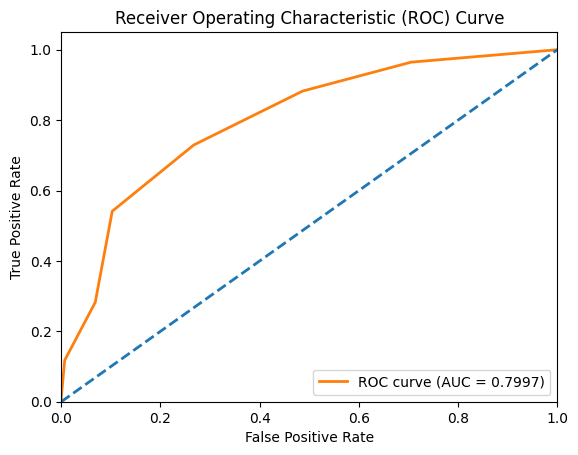

In [25]:
## 참고: ROC 곡선 그리기
fpr, tpr, _ = roc_curve(y_test, y_prob_knn, pos_label = 1) # fpr, tpr, thresholds
plt.figure()
plt.plot(fpr, tpr, color='C1', lw=2, label=f'ROC curve (AUC = {auc_knn:.4f})')
plt.plot([0, 1], [0, 1], color='C0', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 변수 중요도 계산 및 시각화

- 변수 중요도는 모델이 새로운 데이터에 대해 얼마나 잘 일반화되는지를 평가하는 데 사용됨  
따라서 학습 데이터가 아닌 테스트 데이터를 사용하여 변수 중요도를 계산하는 것이 모델의 실제 성능을 더 잘 반영함

- 만약 학습 데이터를 사용하여 변수 중요도를 계산하면 모델이 학습 데이터에 과적합되었을 가능성이 있음  
  이는 변수 중요도가 학습 데이터에 특화된 패턴을 반영하게 되어 새로운 데이터에 대한 일반화 능력을 과대평가할 수있음

- 여러 모델의 변수 중요도를 비교할 때, 동일한 테스트 데이터를 사용하는 것이 공정한 비교를 가능하게 함  
  각 모델이 학습 데이터에 대해 다르게 과적합되었을 수 있으므로, 테스트 데이터를 사용하면 모델 간의 차이를 더 정확하게 파악 가능

  feature  importance       std
1    plas    0.125108  0.013195
7     age    0.040260  0.015614
5    mass    0.037662  0.014101
0    preg    0.025108  0.018346
6    pedi    0.014286  0.013833
2    pres    0.013420  0.015542
3    skin    0.012987  0.023552
4    insu    0.002597  0.014513


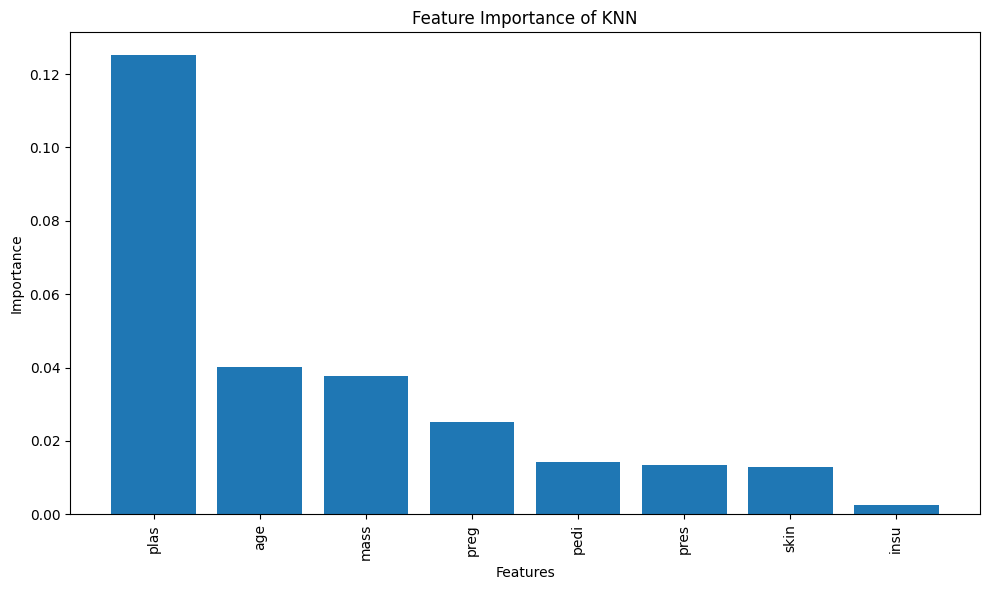

  feature  importance       std
1    plas    0.125108  0.013195
7     age    0.040260  0.015614
5    mass    0.037662  0.014101
0    preg    0.025108  0.018346
6    pedi    0.014286  0.013833
2    pres    0.013420  0.015542
3    skin    0.012987  0.023552
4    insu    0.002597  0.014513


In [26]:
from sklearn.inspection import permutation_importance
result = permutation_importance(knn,
                                                                       X_test_scaled,
                                                                       y_test,
                                                                       n_repeats = 10,
                                                                       random_state = 123)

## 결과 정리
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': result.importances_mean,
    'std': result.importances_std
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

plt.figure(figsize = (10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance of KNN')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

print(feature_importance)


## SVM

### 모델 학습

In [27]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
## 데이터는 KNN과 동일!

In [29]:
## SVM 모델 생성 및 학습
svm = SVC(kernel = 'rbf', # 커널, 'poly', 'linear'
                      C = 1.0, # Cost
                      gamma = 'auto', # 'scale': 1 / (n_features * X.var()), 'auto': 1 / n_features
                      # probability  =  None, # 확률 추정 여부
                      # class_weight = None,  dict or 'balanced'
                      )

svm.fit(X = X_train_scaled, # 표준화 O
                y = y_train)

## 예측
y_pred_svm = svm.predict(X = X_test_scaled)
y_pred_svm

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0])

In [30]:
## 정확도 계산
accuracy_svm = accuracy_score(y_true = y_test,
                                                                   y_pred = y_pred_svm)
accuracy_svm

0.8008658008658008

In [31]:
## 참고
print(classification_report(y_test,
                                                        y_pred_svm, digits = 4))


              precision    recall  f1-score   support

           0     0.7841    0.9452    0.8571       146
           1     0.8545    0.5529    0.6714        85

    accuracy                         0.8009       231
   macro avg     0.8193    0.7491    0.7643       231
weighted avg     0.8100    0.8009    0.7888       231



[[ 47   8]
 [ 38 138]]


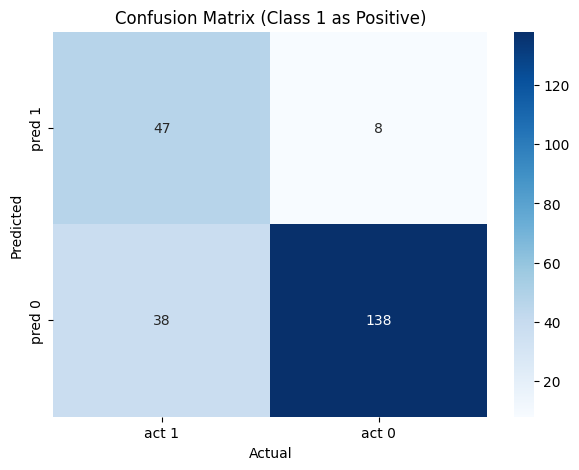

In [32]:
# confusion_matrix(y_test, y_pred_svm)
custom_confusion_matrix(y_test, y_pred_svm)


### 참고: 최적의 C, Gamma 찾기

In [33]:
# 다양한 C와 gamma 값 설정
C_values = [0.1, 1, 10, 100]
gamma_values = ['scale', 'auto', 0.1, 1]

# 결과를 저장할 리스트 생성
results_list = []

# 각 C와 gamma 조합에 대해 모델 학습 및 평가
for C in C_values:
    for gamma in gamma_values:
        svm = SVC(C = C,
                              gamma = gamma,
                              random_state=123)
        svm.fit(X_train_scaled, y_train)

        # 학습 데이터 정확도
        y_train_pred = svm.predict(X_train_scaled)
        train_accuracy = accuracy_score(y_train, y_train_pred)

        # 테스트 데이터 정확도
        y_test_pred = svm.predict(X_test_scaled)
        test_accuracy = accuracy_score(y_test, y_test_pred)

        # 결과 저장
        results_list.append({
            'C': C,
            'gamma':  gamma,
            'train_accuracy': train_accuracy,
            'test_accuracy': test_accuracy
        })

# 리스트를 데이터프레임으로 변환
results = pd.DataFrame(results_list)

# 결과 출력
print(results)

# 테스트 정확도가 가장 높은 조합 찾기
best_combination = results.loc[results['test_accuracy'].idxmax()]
print("\n최적의 조합:")
print(best_combination)

        C  gamma  train_accuracy  test_accuracy
0     0.1  scale        0.698324       0.688312
1     0.1   auto        0.698324       0.688312
2     0.1    0.1        0.716946       0.692641
3     0.1      1        0.659218       0.632035
4     1.0  scale        0.830540       0.800866
5     1.0   auto        0.830540       0.800866
6     1.0    0.1        0.808194       0.796537
7     1.0      1        0.964618       0.714286
8    10.0  scale        0.891993       0.766234
9    10.0   auto        0.891993       0.766234
10   10.0    0.1        0.878957       0.774892
11   10.0      1        1.000000       0.675325
12  100.0  scale        0.959032       0.683983
13  100.0   auto        0.959032       0.683983
14  100.0    0.1        0.951583       0.666667
15  100.0      1        1.000000       0.675325

최적의 조합:
C                      1.0
gamma                scale
train_accuracy     0.83054
test_accuracy     0.800866
Name: 4, dtype: object


### SVM 결과

In [34]:
best_combination

,4
C,1.0
gamma,scale
train_accuracy,0.83054
test_accuracy,0.800866


In [35]:
## 최적 조합으로 모델 재학습
best_svm = SVC(C = best_combination['C'],
                                  gamma = best_combination['gamma'],
                                  random_state = 1,
                                  probability = True
                                  )
best_svm.fit(X_train_scaled, y_train)


## 예측
y_pred_svm = best_svm.predict(X = X_test_scaled)
y_pred_svm


## 정확도 계산
accuracy_svm = accuracy_score(y_true = y_test,
                                                                    y_pred =y_pred_svm)
accuracy_svm

0.8008658008658008

In [36]:
## 예측 확률 계산
y_pred_proba_svm = best_svm.predict_proba(X_test_scaled)[:, 1]


## AUC 계산
auc_svm = roc_auc_score(y_test, y_pred_proba_svm)
print("AUC:", np.round(auc_svm, 4))

AUC: 0.865


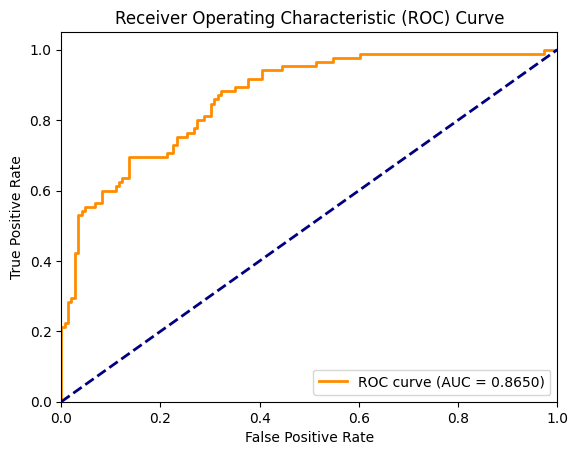

In [37]:
## ROC 곡선 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_svm, pos_label=1)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_svm:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 변수 중요도 계산 및 시각화

  feature  importance       std
1    plas    0.177922  0.020621
5    mass    0.039394  0.007359
7     age    0.025108  0.012666
6    pedi    0.022511  0.009445
0    preg    0.016883  0.005284
3    skin    0.016017  0.006436
2    pres    0.002597  0.006183
4    insu   -0.002597  0.006183


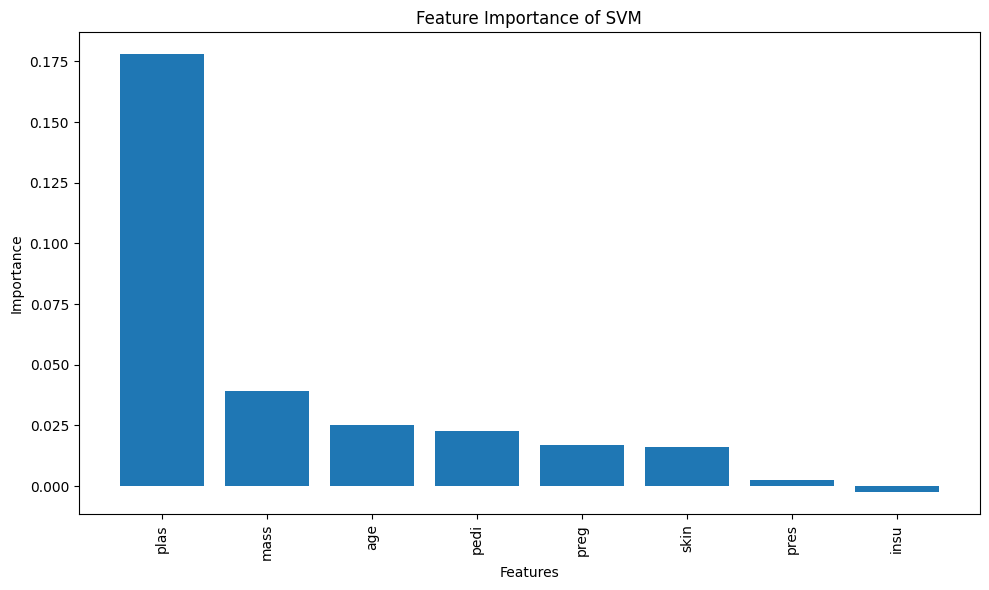

  feature  importance       std
1    plas    0.177922  0.020621
5    mass    0.039394  0.007359
7     age    0.025108  0.012666
6    pedi    0.022511  0.009445
0    preg    0.016883  0.005284
3    skin    0.016017  0.006436
2    pres    0.002597  0.006183
4    insu   -0.002597  0.006183


In [38]:
from sklearn.inspection import permutation_importance
result = permutation_importance(best_svm,
                                                                       X_test_scaled,
                                                                       y_test,
                                                                       n_repeats=10,
                                                                       random_state=123)

# 결과 정리
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': result.importances_mean,
    'std': result.importances_std
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print(feature_importance)

plt.figure(figsize = (10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance of SVM')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

print(feature_importance)


## Decision Tree
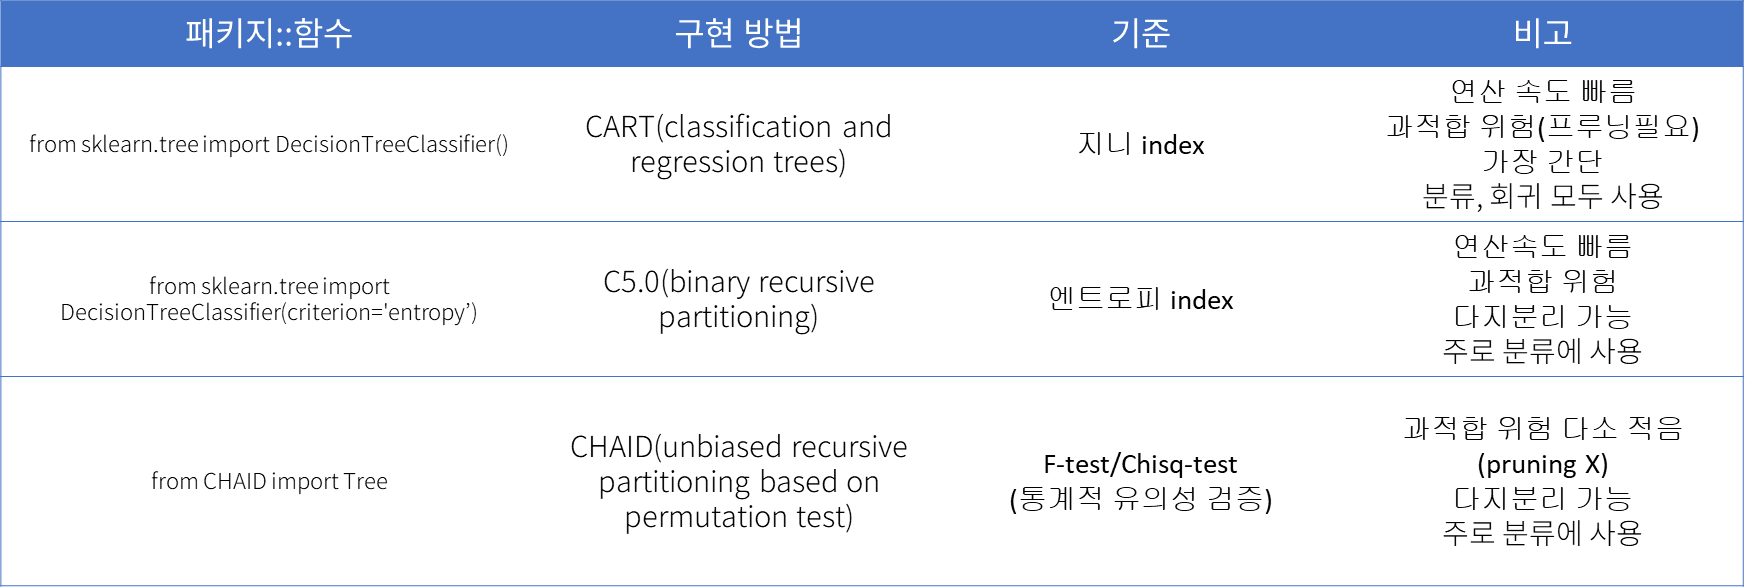

In [39]:
## KNN과 동일!

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

### 모델 학습

In [41]:
## Decision Tree 모델 생성 및 학습
dt  =  DecisionTreeClassifier(
                                  criterion = 'gini',  # 불순도, 'entropy'
                                  splitter = 'best',   # 분할 전략
                                  max_depth = None,    # 트리의 최대 깊이
                                  min_samples_split = 2,  # 내부 노드를 분할하는 데 필요한 최소 샘플 수
                                  min_samples_leaf = 1,   # 리프 노드에 있어야 할 최소 샘플 수
                                  random_state = 1234    # 랜덤 시드
)

dt.fit(X = X_train, y = y_train) ## X_train_scaled를 사용해도 괜찮으나, 일반적으로 변수표준화 사용 안함..!!!!!!!!!

DecisionTreeClassifier(random_state=1234)

In [42]:
## 테스트 데이터에 대한 예측
y_pred_dt = dt.predict(X = X_test)
y_pred_dt_proba  =  dt.predict_proba(X = X_test)[:, 1]

In [43]:
# 정확도 계산
accuracy_dt = accuracy_score(y_true=y_test, y_pred=y_pred_dt)
accuracy_dt

0.6536796536796536

In [44]:
## 참고
print(classification_report(y_test,
                                                        y_pred_dt, digits = 4))


              precision    recall  f1-score   support

           0     0.7143    0.7534    0.7333       146
           1     0.5325    0.4824    0.5062        85

    accuracy                         0.6537       231
   macro avg     0.6234    0.6179    0.6198       231
weighted avg     0.6474    0.6537    0.6497       231



[[ 41  36]
 [ 44 110]]


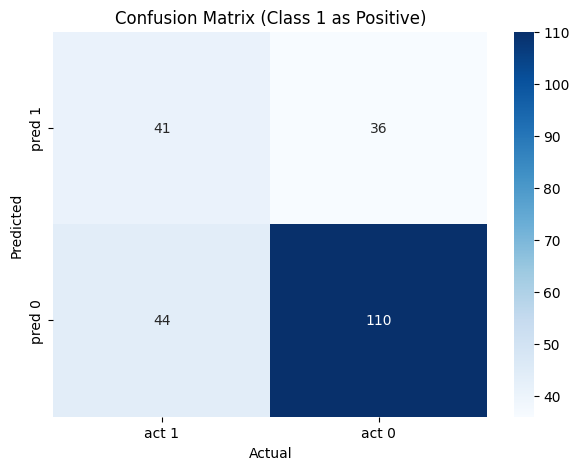

In [45]:
# confusion_matrix(y_test, y_pred_dt)
custom_confusion_matrix(y_test, y_pred_dt)


### 참고: 최적의 사용자 파라 찾기

In [46]:
from sklearn.model_selection import GridSearchCV

## 그리드 서치를 위한 파라미터 설정
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 그리드 서치 수행
dt = DecisionTreeClassifier(random_state=1234)
grid_search = GridSearchCV(dt,
                                                           param_grid,
                                                           cv = 3,
                                                           scoring='accuracy',
                                                           n_jobs=-1 # 병렬 처리, -1은 ALL
                                                            )
grid_search.fit(X_train,   y_train) ## X_train_scaled를 사용해도 괜찮으나, 일반적으로 변수표준화 사용 안함..!!!!!!!!!

# 최적의 파라미터 및 모델 출력
print("최적의 파라미터:", grid_search.best_params_)
dt_best_param = grid_search.best_estimator_

# 테스트 세트에 대한 예측
y_pred = dt_best_param.predict(X_test)
y_pred_proba = dt_best_param.predict_proba(X_test)[:, 1]

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print(f"테스트 세트 정확도: {accuracy:.4f}")

# AUC 계산
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC: ", np.round(auc, 4))


최적의 파라미터: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 5}
테스트 세트 정확도: 0.6450
AUC:  0.6574


### DT 결과

In [47]:
## Decision Tree 모델 생성 및 학습
best_dt  =  DecisionTreeClassifier(
                                  criterion = 'gini',  # 불순도, 'entropy'
                                  splitter = 'best',   # 분할 전략
                                  max_depth = 9,    # 트리의 최대 깊이
                                  min_samples_split = 2,  # 내부 노드를 분할하는 데 필요한 최소 샘플 수
                                  min_samples_leaf = 5,   # 리프 노드에 있어야 할 최소 샘플 수
                                  random_state = 1234    # 랜덤 시드

)
best_dt.fit(X = X_train, y = y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=5, random_state=1234)

In [48]:
## 테스트 데이터에 대한 예측
y_pred_dt = best_dt.predict(X = X_test)

# 정확도 계산
accuracy_dt = accuracy_score(y_true=y_test,
                                                               y_pred=y_pred_dt)
accuracy_dt


0.6753246753246753

In [49]:
#  예측 확률 계산
y_pred_proba_dt = best_dt.predict_proba(X_test)[:, 1]

# AUC 계산
auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
print("AUC:", np.round(auc_dt, 4))

AUC: 0.7208


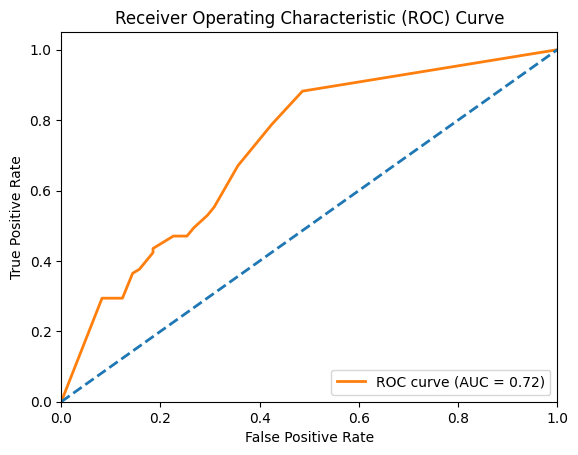

In [50]:
## ROC 곡선 그리기
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_dt, pos_label = 1)
plt.figure()
plt.plot(fpr, tpr, color='C1', lw=2, label=f'ROC curve (AUC = {auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='C0', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### 변수 중요도 계산 및 시각화



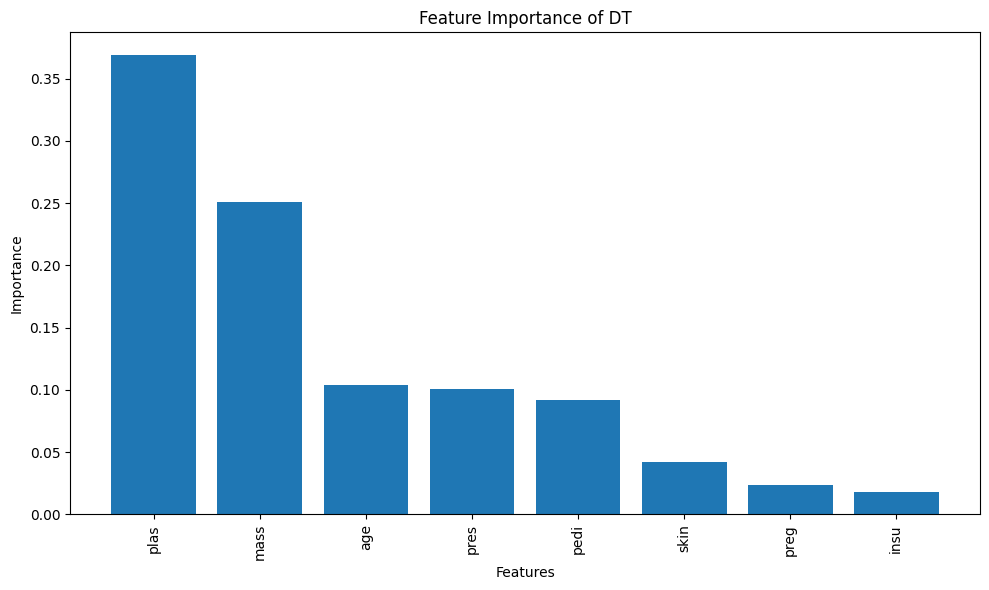

  feature  importance
1    plas    0.368824
5    mass    0.251328
7     age    0.103855
2    pres    0.100693
6    pedi    0.092087
3    skin    0.041701
0    preg    0.023430
4    insu    0.018082


In [51]:
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': best_dt.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending = False)

plt.figure(figsize = (10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance of DT')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

print(feature_importance)

#### 참고: DT 그리기

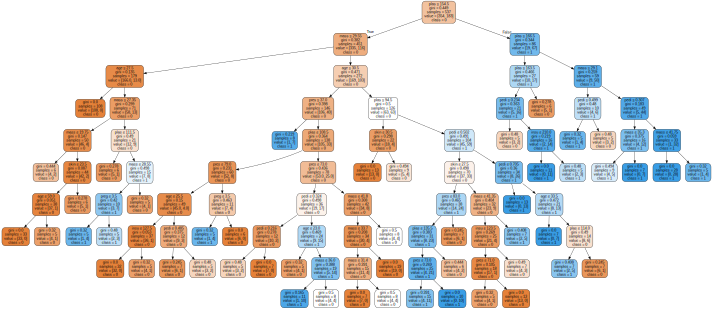

In [52]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz


## 트리 시각화를 위한 DOT 데이터 생성
dot_data = export_graphviz(
    best_dt,
    out_file = None,
    feature_names = X_train.columns,
    class_names = ['0', '1'],  # 클래스 레이블에 맞게 수정 필요
    filled = True,
    rounded = True,
    special_characters = True
    # max_depth=3,  # 표시할 최대 깊이 제한
    # proportion=False,  # 비율 대신 샘플 수 표시
    # precision=0,  # 소수점 이하 자릿수 제거
    # node_ids=False,  # 노드 ID 숨기기

)

## DOT 데이터를 이용해 그래프 생성
dot_data = 'digraph Tree { size="10 ,10";\n' + dot_data.split('digraph Tree {', 1)[1]

##그래프를 파일로 저장?
# graph.render("decision_tree", format="png", cleanup=True)

## 그래프 표시
graph = graphviz.Source(dot_data)
graph

### 참고: CHAID

In [53]:
!pip install CHAID
from CHAID import Tree
from sklearn.tree import plot_tree

Accuracy: 0.7229
AUC: 0.7134


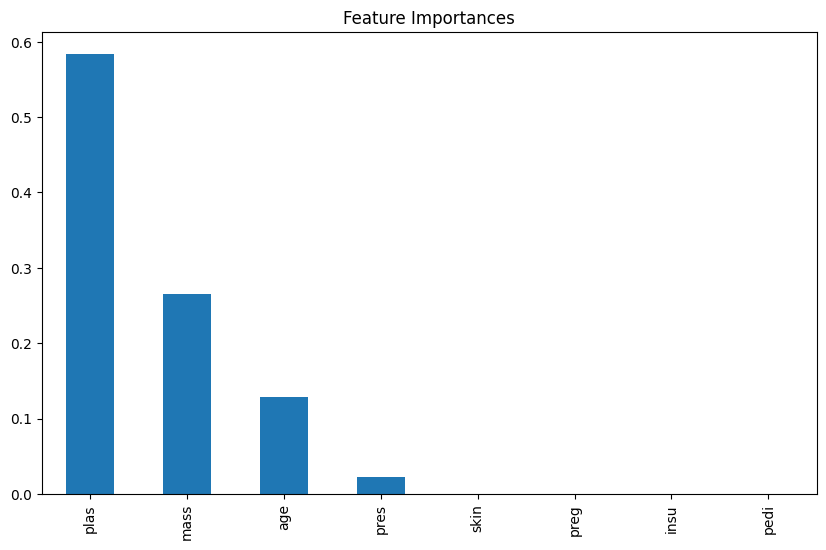

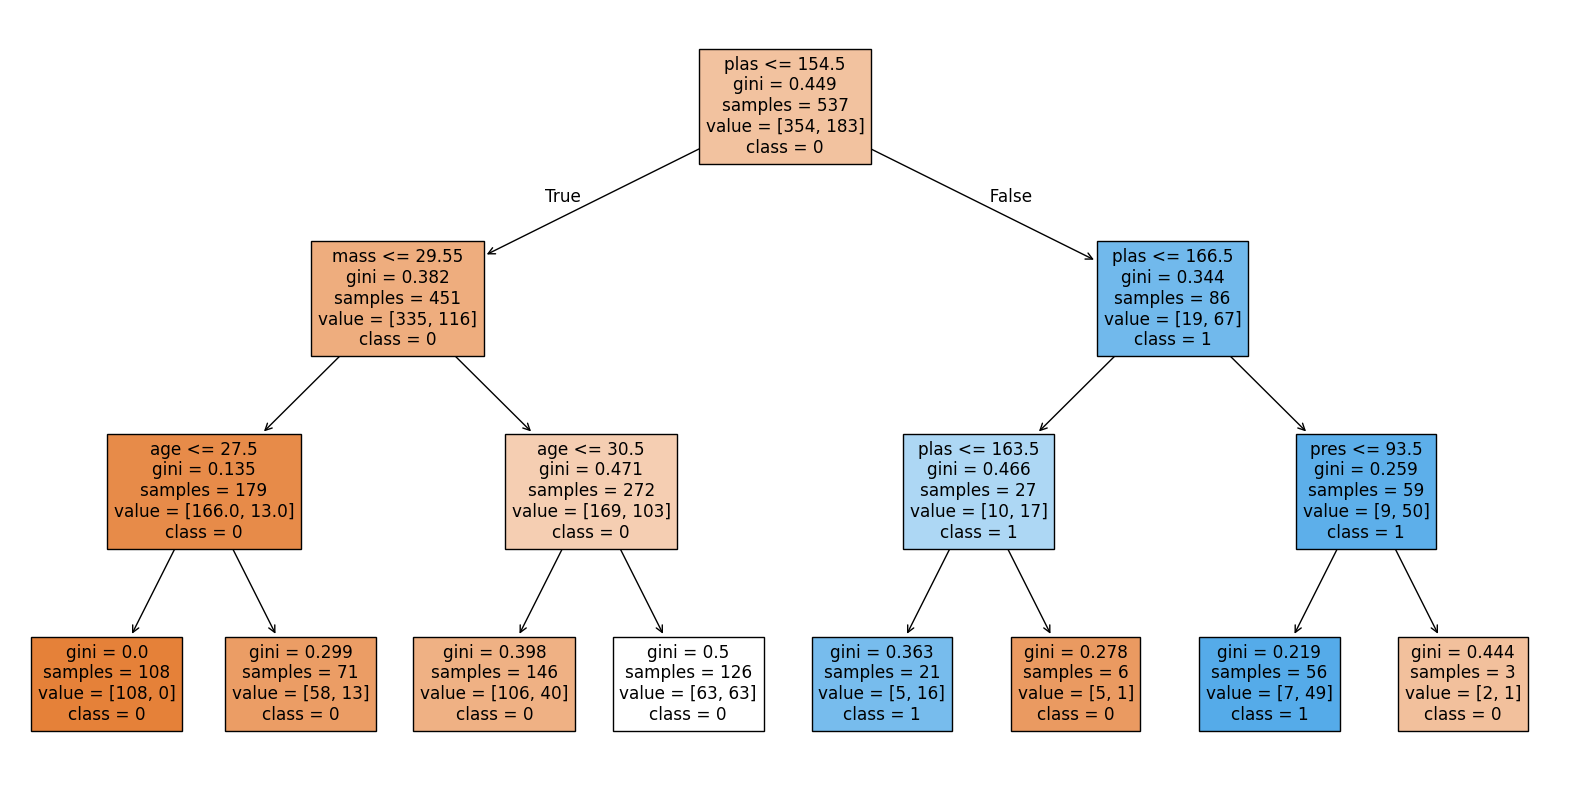

In [54]:
# 결정 트리 모델 훈련
clf = DecisionTreeClassifier(max_depth = 3,
                                                        random_state =12345)  # 최대 깊이를 3으로 설정
clf.fit(X_train, y_train)

# 모델 예측
y_pred_chaid = clf.predict(X_test)

# 정확도 및 AUC 계산
accuracy = accuracy_score(y_test, y_pred_chaid)
auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

print(f'Accuracy: {accuracy:.4f}')
print(f'AUC: {auc:.4f}')

# 변수 중요도 계산 및 시각화
feature_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importances')
plt.show()

# 결정 트리 시각화
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X_train.columns, class_names=['0', '1'], filled=True)
plt.show()

## Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler

In [56]:
## KNN과 동일!

### 모델 학습

In [57]:
## Naive Bayes 모델 생성 및 학습
nb = GaussianNB()

nb.fit(X_train_scaled, y_train) # 일반적으로는 필요가 없으나, 도움이 되는 경우도 있음..

GaussianNB()

### NB 결과

In [58]:
## 예측
y_pred_nb = nb.predict(X = X_test_scaled)
y_pred_proba_nb = nb.predict_proba(X = X_test_scaled)[:, 1] # 1일 확률


# 정확도 계산
accuracy_nb = accuracy_score(y_true = y_test,
                                                                y_pred = y_pred_nb)
accuracy_nb

0.8181818181818182

In [59]:
## 참고
print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.6975    0.7740    0.7338       146
           1     0.5217    0.4235    0.4675        85

    accuracy                         0.6450       231
   macro avg     0.6096    0.5988    0.6006       231
weighted avg     0.6328    0.6450    0.6358       231



[[ 54  11]
 [ 31 135]]


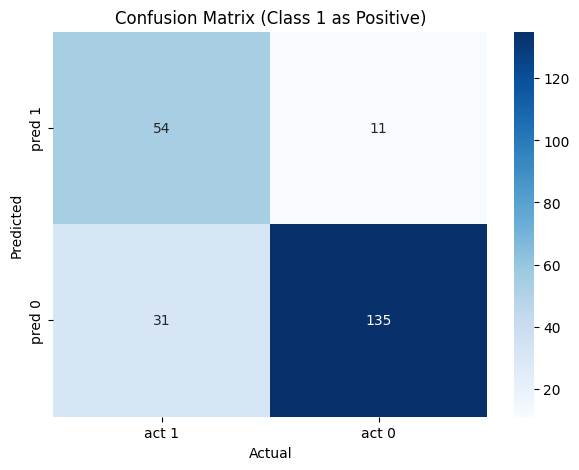

In [60]:
custom_confusion_matrix(y_test, y_pred_nb)

In [61]:
auc_nb = roc_auc_score(y_test, y_pred_proba_nb)
auc_nb

np.float64(0.8539887187751813)

In [62]:
## 참고: ROC 곡선 그리기
fpr, tpr, _ = roc_curve(y_true = y_test,
                                              y_score =  y_pred_proba_nb,
                                              pos_label = 1)

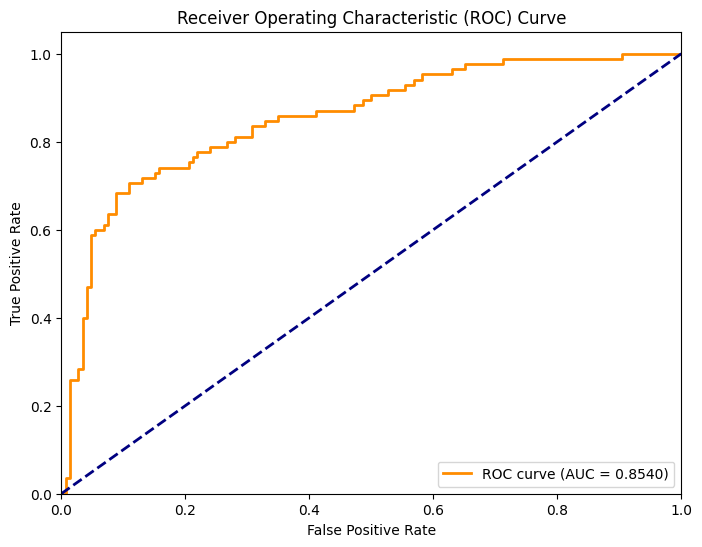

In [63]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_nb:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

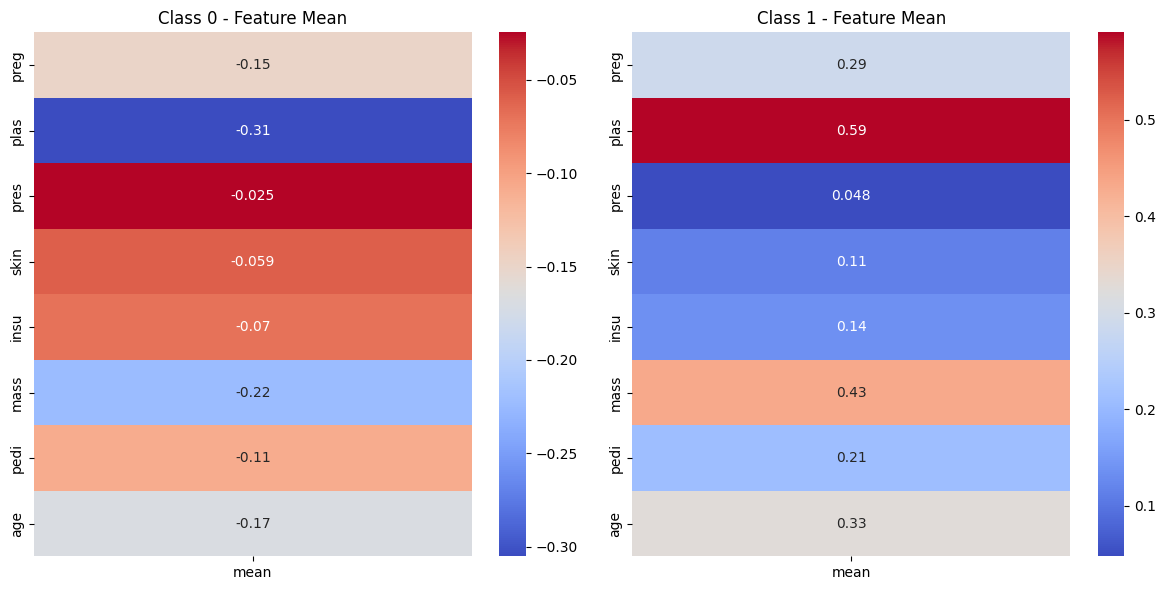

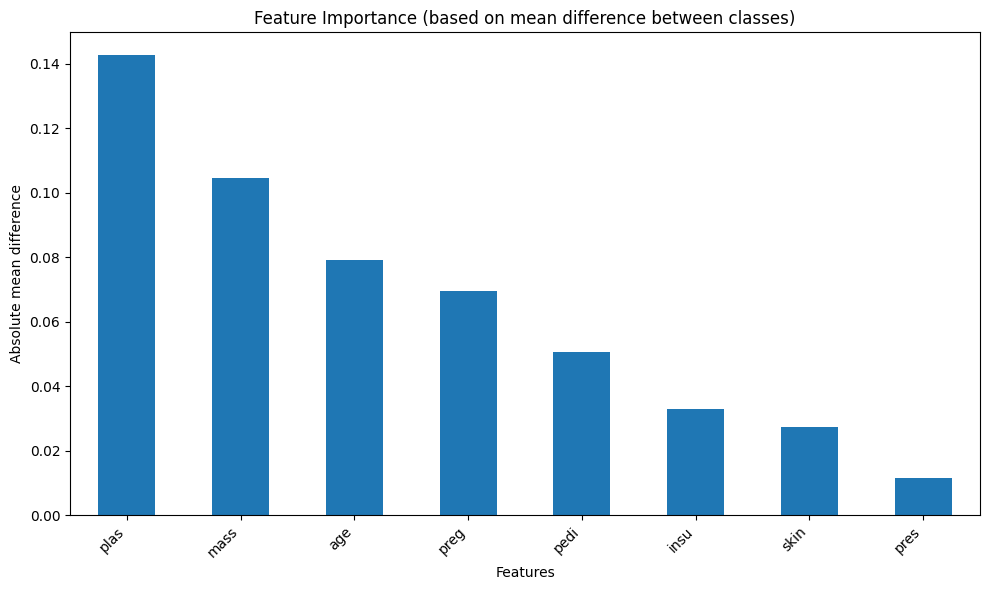

In [64]:
# 변수 중요도 (Naive Bayes에서는 직접적인 변수 중요도를 제공하지 않음....)
# 대신 각 클래스에 대한 특성의 평균과 분산을 시각화
feature_means = nb.theta_
# feature_var = nb.sigma_

plt.figure(figsize=(12, 6))
for i, class_label in enumerate(['Class 0', 'Class 1']):
    plt.subplot(1, 2, i+1)
    sns.heatmap(pd.DataFrame({'mean': feature_means[i] },
                             index=X_train.columns),
                annot=True, cmap='coolwarm')
    plt.title(f'{class_label} - Feature Mean')
plt.tight_layout()
plt.show()

# 각 특성의 클래스 간 평균 계산 (특성 중요도의 근사치로 사용 가능)
mean_diff = np.abs(feature_means[1] + feature_means[0])/2
feature_importance = pd.Series(mean_diff, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance (based on mean difference between classes)')
plt.xlabel('Features')
plt.ylabel('Absolute mean difference')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# 분류 모델 결과 비교

In [65]:
## 분류 모델 결과 비교
comparison_df = pd.DataFrame({
                                        'Model': ['KNN', 'SVM', 'DT', 'NB'],
                                        'Accuracy': [accuracy_knn, accuracy_svm, accuracy_dt, accuracy_nb],
                                        'AUC': [auc_knn, auc_svm, auc_dt, auc_nb]
})
comparison_df

,Model,Accuracy,AUC
0,KNN,0.766234,0.799678
1,SVM,0.800866,0.865028
2,DT,0.675325,0.720790
3,NB,0.818182,0.853989


In [66]:
comparison_df.sort_values(by = 'AUC',  ascending = False)

,Model,Accuracy,AUC
1,SVM,0.800866,0.865028
3,NB,0.818182,0.853989
0,KNN,0.766234,0.799678
2,DT,0.675325,0.720790


## 참고: 결정 경계

In [67]:
## 기존 모델 결과 활용
models = {
        'KNN': knn,
        'SVM': best_svm,
        'Decision Tree': best_dt,
        'Naive Bayes': nb
}

KNN
SVM
Decision Tree
Naive Bayes


<Figure size 1400x1000 with 0 Axes>

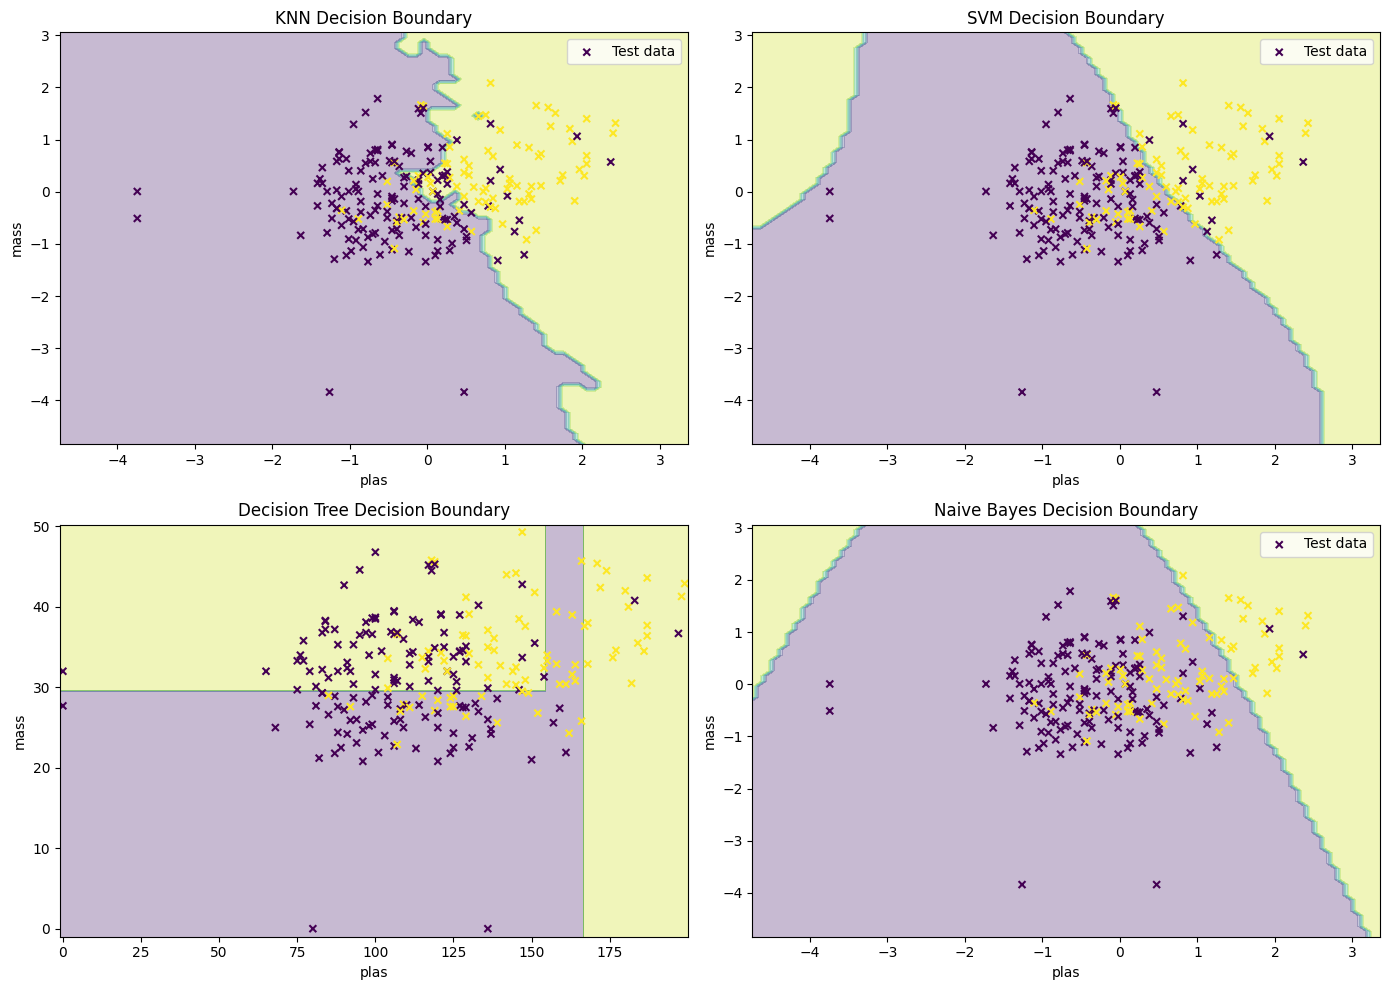

In [68]:
import numpy as np
import matplotlib.pyplot as plt

## 선택할 두 변수의 이름
feature_1_name = 'plas'  # 첫 번째 변수 이름
feature_2_name = 'mass'  # 두 번째 변수 이름

## 선택된 변수의 인덱스 찾기
feature_1_index = train_data.columns.get_loc(feature_1_name)
feature_2_index = train_data.columns.get_loc(feature_2_name)

##  그래프 설정
plt.figure(figsize=(14, 10))
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

cordiates = [(0, 0), (0, 1), (1, 0), (1, 1)]

## 각 모델에 대해 결정 경계 그리기
for i, (name, model) in enumerate(models.items()):
    print(name)
    xi, yi = cordiates[i]

    ## 서브플롯 생성


    if name == 'Decision Tree':
      x_min, x_max = X_test.iloc[:, feature_1_index].min() - 1, X_test.iloc[:, feature_1_index].max() + 1
      y_min, y_max = X_test.iloc[:, feature_2_index].min() - 1, X_test.iloc[:, feature_2_index].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

      grid_points = np.c_[xx.ravel(), yy.ravel()]
      X_grid_full = np.zeros((grid_points.shape[0], X_test.shape[1]))
      X_grid_full[:, feature_1_index] = grid_points[:, 0]
      X_grid_full[:, feature_2_index] = grid_points[:, 1]


      ## 원래 모델을 사용하여 예측 수행
      X_grid_full = pd.DataFrame(X_grid_full)
      X_grid_full.columns = X_train.columns
      X_grid_full
      Z = model.predict(X_grid_full).reshape(xx.shape)

      ax[xi, yi].contourf(xx, yy, Z, alpha=0.3)
      ax[xi, yi].scatter(X_test.iloc[:, feature_1_index],
                                        X_test.iloc[:, feature_2_index],
                                        c = y_test,
                                        marker = 'x',
                                        s  = 25)
      ax[xi, yi].set_title(name + " Decision Boundary")
      ax[xi, yi].set_xlabel(f'{feature_1_name}')
      ax[xi, yi].set_ylabel(f'{feature_2_name}')
      # ax[xi, yi].legend(['Test data'], loc='upper right')


    else:
        ## 결정 경계를 그리기 위한 그리드 설정
        x_min, x_max = X_test_scaled[:, feature_1_index].min() - 1, X_test_scaled[:, feature_1_index].max() + 1
        y_min, y_max = X_test_scaled[:, feature_2_index].min() - 1, X_test_scaled[:, feature_2_index].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                                                    np.arange(y_min, y_max, 0.1))




        ## 원래 모델을 사용해 선택된 변수로 예측할 수 있도록 입력 데이터의 형식 유지
        grid_points = np.c_[xx.ravel(), yy.ravel()]


        ## 전체 특성 공간을 갖춘 예측 데이터 생성
        X_grid_full = np.zeros((grid_points.shape[0], X_test_scaled.shape[1]))  ## X_test와 같은 열 개수로 생성
        X_grid_full[:, feature_1_index] = grid_points[:, 0]
        X_grid_full[:, feature_2_index] = grid_points[:, 1]


        ## 원래 모델을 사용하여 예측 수행
        Z = model.predict(X_grid_full).reshape(xx.shape)


        ax[xi, yi].contourf(xx, yy, Z, alpha=0.3)
        ax[xi, yi].scatter(X_test_scaled[:, feature_1_index],
                                          X_test_scaled[:, feature_2_index],
                                          c = y_test,
                                          marker = 'x',
                                          s  = 25)
        ax[xi, yi].set_title(name + " Decision Boundary")
        ax[xi, yi].set_xlabel(f'{feature_1_name}')
        ax[xi, yi].set_ylabel(f'{feature_2_name}')
        ax[xi, yi].legend(['Test data'], loc='upper right')



plt.tight_layout()
plt.show()



In [69]:
# EOS